# Prueba Búsquedas 
  ## Parques de la ciudad de Guayaquil
  #### Leandro León
  
  ## Mapa en 5 niveles
   <img src="mapa.png">
   
   ## Árbol 
   
   
   
   
   # BÚSQUEDA POR AMPLITUD

In [8]:
import matplotlib.pyplot as plt
from networkx import nx
G=nx.Graph()
class Node:
    def __init__(self, data, child=None): # Constructor de la clase
        self.data = data
        self.child = None
        self.fathr = None
        self.cost = None
        self.set_child(child)
       

    def set_child(self, child): # Agregar hijos
        self.child = child
        if self.child is not None:
            for ch in self.child:
                ch.fathr = self
            
    def equal(self, node): # Igual al equals de Java
        if self.data == node.data:
            return True
        else:
            return False

    def on_list(self, node_list): # Verfiicar su el nodo esta en la lista
        listed = False
        for n in node_list:
            if self.equal(n):
                listed = True
        return listed

    def __str__(self): # Igual al toString Java
        return str(self.data)

['P Local', 'P Infantil Atarzana', 'P Albatros', 'P Clemente', 'P Ramón U', 'P Forestal', 'P Los Caminantes', 'P Lago']


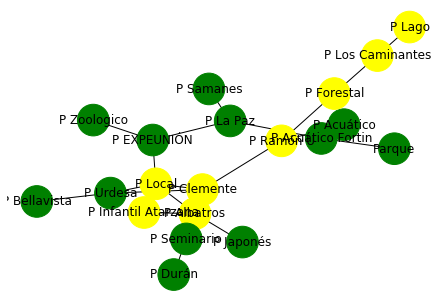

In [11]:
# Implementacion del metodo de busqueda por amplitud
def search_Amplitud_solution(connections, init_state, solution):
    solved = False # Variable para almacenar el estado de la busqueda
    visited_nodes = [] # Nodos visitados
    frontrs_nodes = [] # Nodos en busqueda o lista nodos

    init_node = Node(init_state) # Nodo inicial
    frontrs_nodes.append(init_node)
    while (not solved) and len(frontrs_nodes) != 0:
        node = frontrs_nodes[0]
        # extraer nodo y añadirlo a visitados
        visited_nodes.append(frontrs_nodes.pop(0))
        if node.data == solution: # Preguntar se el nodo obtenido es la solucion
            solved = True
            return node # Retornamos el nodo de la solucion
        else:
            # expandir nodos hijo - ciudades con conexion
            node_data = node.data
            child_list = []
            for chld in connections[node_data]:
                child = Node(chld)
                child_list.append(child)
                if not child.on_list(visited_nodes) and not child.on_list(frontrs_nodes):
                    frontrs_nodes.append(child)
            node.set_child(child_list)

if __name__ == "__main__":
    connections = {
       'P Local': {'P Infantil Atarzana',  'P EXPEUNIÓN'},
    'P EXPEUNIÓN':{	'P Local', 'P Zoologico', 'P La Paz'},
        'P Zoologico':{'P EXPEUNIÓN'},
        'P La Paz':{'P EXPEUNIÓN', 'P Samanes', 'P Acuático Fortin'},
            'P Samanes':{'P La Paz'},
            'P Acuático Fortin':{'P La Paz', 'Parque'},
                'Parque':{'P Acuático Fortin'},
'P Infantil Atarzana':{'P Local', 'P Albatros'},
'P Albatros':{'P Infantil Atarzana', 'P Japonés', 'P Clemente'},
    'P Japonés':{'P Albatros'},
'P Clemente':{'P Albatros','P Urdesa', 'P Seminario', 'P Ramón U'},
    'P Seminario':{'P Clemente', 'P Durán'},
        'P Durán':{'P Seminario'},
    'P Ramón U':{'P Clemente', 'P Forestal','P Acuático'},
        'P Acuático':{'P Ramón U'},
        'P Forestal':{'P Ramón U', 'P Los Caminantes'},
            'P Los Caminantes':{'P Forestal','P Lago' },
                'P Lago':{'P Los Caminantes'},
'P Urdesa':{'P Clemente','P Bellavista'},
        'P Bellavista':{'P Urdesa'}
    }

    init_state = 'P Local'
    solution = 'P Lago'
    solution_node = search_Amplitud_solution(connections, init_state, solution)
    # mostrar resultado
    result = []
    node = solution_node
 
    if node is not None: 
        while node.fathr is not None:
            result.append(node.data)
            node = node.fathr
        result.append(init_state)
        result.reverse() # Reverso el resultado (Solo para presentar)
        print(result)
    else:
        print("No hay solucion !!!!")
        
    G.add_nodes_from(connections.keys())
    for nodo, v in connections.items():
        G.add_edges_from(([(nodo,t) for t in v]))
        
    
    G.add_nodes_from(connections.keys())
    color_map = [] 
    keys= connections.keys()
    for r in keys:
        
        if r in result:
           
            color_map.append('yellow')
                       
        else:
            
            color_map.append('green')

    for nodo, v in connections.items():
        G.add_edges_from(([(nodo,t) for t in v]))
    #nx.draw(G,with_labels=True)
    nx.draw(G,node_color=color_map, with_labels=True, node_size=1000)
    plt.show()

# BÚSQUEDA POR COSTO


In [12]:
# Busqueda por costo.

# Creamos la clase Nodo
import matplotlib.pyplot as plt
from networkx import nx
G=nx.Graph()
class Node:
    def __init__(self, data, child=None): # Constructor de la clase
        self.data = data
        self.child = None
        self.fathr = None
        self.cost = None # Importante tener el costo de recorer el nodo
        self.set_child(child)

    def set_child(self, child): # Agregar hijos
        self.child = child
        if self.child is not None:
            for ch in self.child:
                ch.fathr = self
            
    def equal(self, node):
        if self.data == node.data:
            return True
        else:
            return False

    def on_list(self, node_list): # Verfiicar su el nodo esta en la lista
        listed = False
        for n in node_list:
            if self.equal(n):
                listed = True
        return listed

    def __str__(self): # Igual al toString Java
        return str(self.data)
    #Definimos una funcion para obtener el costo - CompareTo (Java)
  

['P Local', 'P Infantil Atarzana', 'P Albatros', 'P Clemente', 'P Ramón U', 'P Forestal', 'P Los Caminantes']
Costo total: 62


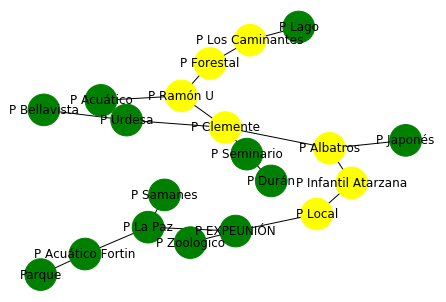

In [17]:
def Compare(node):
    return node.cost
# Implementacion del metodo de busqueda por costo
def search_costo_solucion(connections, init_state, solution):
    solved = False # Variable para almacenar el estado de la busqueda
    visited_nodes = [] # Nodos visitados
    frontier_nodes = [] # Nodos en busqueda o lista nodos o nodos por visitar

    init_node = Node(init_state) # Nodo inicial
    init_node.cost =0 # Agregar costo inicial
    frontier_nodes.append(init_node)
    while (not solved) and len(frontier_nodes) != 0:
        
        frontier_nodes = sorted(frontier_nodes, key=Compare) # Ordenar lista de nodos 
        node = frontier_nodes[0]
        visited_nodes.append(frontier_nodes.pop(0)) # Extraer nodo y añadirlo a visitados
        
        if node.data == solution:# Solucion encontrada
            solved = True
            return node
        
        else:
            node_data = node.data# Expandir nodos hijo (ciudades con conexion)
            child_list = []
            for achild in connections[node_data]: # Recorrera cada uno de los nodos hijos
                child = Node(achild)
                cost = connections[node_data][achild] # Obtener el costo del nodo
                child.cost = node.cost + cost # Agregamos el costo actual del nodo + el historial
                child_list.append(child)
                if not child.on_list(visited_nodes):
                    if child.on_list(frontier_nodes): # Si está en la lista lo sustituimos con el nuevo valor de coste si es menor
                        for n in frontier_nodes:
                            if n.equal(child) and n.cost > child.cost:
                                frontier_nodes.remove(n)
                                frontier_nodes.append(child)
                    else:
                        frontier_nodes.append(child)
            node.set_child(child_list)

if __name__ == "__main__":
    connections = {
        'P Local': {'P Infantil Atarzana':1, 'P EXPEUNIÓN':5},
    'P EXPEUNIÓN':{'P Local':5, 'P Zoologico':15, 'P La Paz':20},
        'P Zoologico':{'P EXPEUNIÓN':15},
        'P La Paz':{'P EXPEUNIÓN':20, 'P Samanes':10,'P Acuático Fortin':15},
            'P Samanes':{'P La Paz':10},
            'P Acuático Fortin':{'P La Paz':15, 'Parque':9},
                'Parque':{'P Acuático Fortin':9},
'P Infantil Atarzana':{'P Local':1, 'P Albatros':2},
'P Albatros':{'P Infantil Atarzana':2, 'P Japonés':4, 'P Clemente':3},
    'P Japonés':{'P Albatros':4},
'P Clemente':{'P Albatros':3,'P Urdesa':6, 'P Seminario':12, 'P Ramón U':10},
    'P Seminario':{'P Clemente':12, 'P Durán':25},
        'P Durán':{'P Seminario':25},
    'P Ramón U':{'P Clemente':10, 'P Forestal':16,'P Acuático':22},
        'P Acuático':{'P Ramón U':22},
        'P Forestal':{'P Ramón U':16, 'P Los Caminantes':30},
            'P Los Caminantes':{'P Forestal':30,'P Lago':38 },
                'P Lago':{'P Los Caminantes':38},
'P Urdesa':{'P Clemente':6,'P Bellavista':4},
        'P Bellavista':{'P Urdesa':4}
    }

    init_state = 'P Local'
    solution = 'P Los Caminantes'
    solution_node = search_costo_solucion(connections, init_state, solution)
    # mostrar resultado
    result = []
    node = solution_node
    if node is not None: 
        while node.fathr is not None:
            result.append(node.data)
            node = node.fathr
        result.append(init_state)
        result.reverse() # Reverso el resultado (Solo para presentar)
        print(result)
        print("Costo total: %s" % str(solution_node.cost)) # Imprimir el costo total de llegar al nodo
    else:
        print("No hay solucion !!!!")
        
        
    G.add_nodes_from(connections.keys())
    
    color_map = [] 
    keys= connections.keys()
    for r in keys:
        
        if r in result:
           
            color_map.append('yellow')
            
                       
        else:
            
            color_map.append('green')

      
    for nodo, v in connections.items():
       
        G.add_edges_from(([(nodo,t) for t in v]))
    
    
    #edges=nx.draw_networkx_edges(G,pos=)
    
    nx.draw(G,node_color=color_map, with_labels=True,  node_size=1000)

    plt.show()
